In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("clean_data.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,track,artist,id,search term,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,0,0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,...,0.9440,0.8040,0.00000,0.917,0.3950,66.521,96053.0,35,3966.0,49.000000
1,1,1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,...,0.0370,0.0648,0.00001,0.803,0.3560,104.023,209277.0,27,553.0,77.000000
2,2,2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,...,0.2300,0.0351,0.00000,0.283,0.8370,127.994,246826.0,20,91.0,41.500000
3,3,3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,...,0.0517,0.9930,0.82700,0.112,0.0345,89.789,112000.0,0,9.0,37.666667
4,4,4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,...,0.0377,0.5070,0.34800,0.115,0.0382,94.837,252682.0,4,3087.0,25.000000


In [12]:
df[df.columns[6:]].corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
danceability,1.000000,0.191503,0.034859,0.335458,-0.053447,0.215534,-0.267318,-0.226423,-0.134976,0.502099,0.090255,-0.045257,0.133107,-0.055569,-0.006731
energy,0.191503,1.000000,0.052173,0.758635,-0.050894,-0.003112,-0.681679,-0.277874,0.203910,0.308288,0.249822,0.035511,0.103231,0.051769,0.039355
key,0.034859,0.052173,1.000000,0.053735,-0.187588,0.030521,-0.051292,-0.029011,0.016499,0.043703,0.020320,-0.008575,0.015636,0.009872,-0.001430
loudness,0.335458,0.758635,0.053735,1.000000,-0.026889,-0.034552,-0.555381,-0.464791,0.071018,0.342732,0.225713,0.028796,0.221336,0.077377,0.100992
mode,-0.053447,-0.050894,-0.187588,-0.026889,1.000000,-0.019151,0.052982,-0.027843,0.007438,0.004468,-0.004417,-0.000939,-0.017067,0.051520,0.004618
speechiness,0.215534,-0.003112,0.030521,-0.034552,-0.019151,1.000000,0.027945,-0.242770,0.172888,0.087182,-0.013663,-0.016583,-0.100492,-0.074630,-0.112638
acousticness,-0.267318,-0.681679,-0.051292,-0.555381,0.052982,0.027945,1.000000,0.218381,-0.052608,-0.208959,-0.211182,-0.035998,-0.113604,0.001851,-0.010408
instrumentalness,-0.226423,-0.277874,-0.029011,-0.464791,-0.027843,-0.242770,0.218381,1.000000,-0.112169,-0.285765,-0.069662,0.002840,-0.233451,-0.150880,-0.190725
liveness,-0.134976,0.203910,0.016499,0.071018,0.007438,0.172888,-0.052608,-0.112169,1.000000,-0.000906,-0.027031,0.013130,-0.032405,0.056271,0.048725
valence,0.502099,0.308288,0.043703,0.342732,0.004468,0.087182,-0.208959,-0.285765,-0.000906,1.000000,0.157876,-0.097651,0.103641,0.116984,0.038851


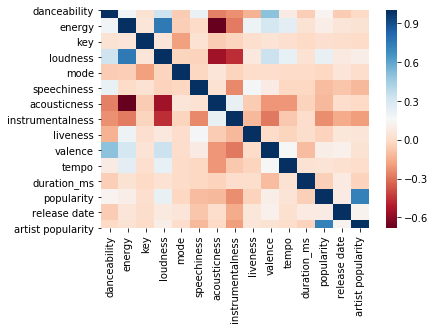

In [8]:
import seaborn as sns
df_var = df[df.columns[6:]]
sns.heatmap(df_var.corr(), cmap ="RdBu")

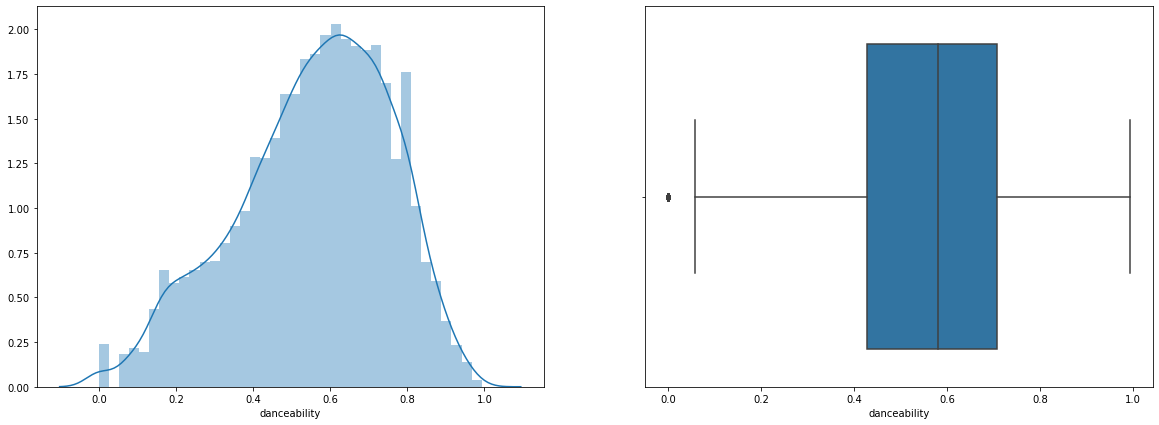

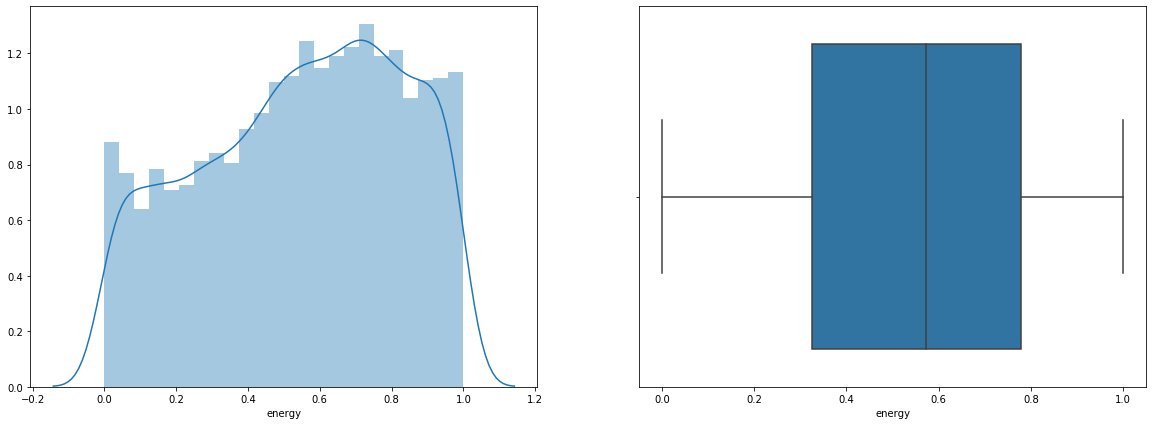

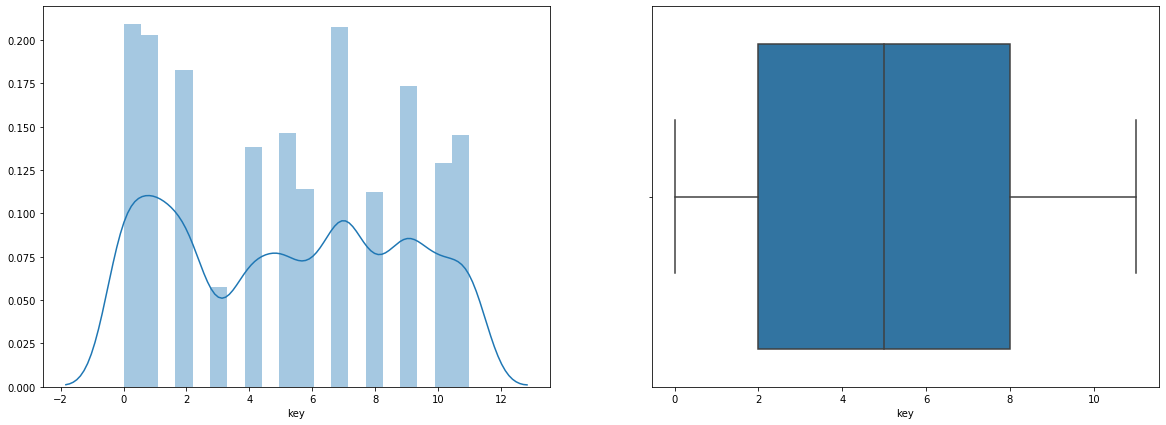

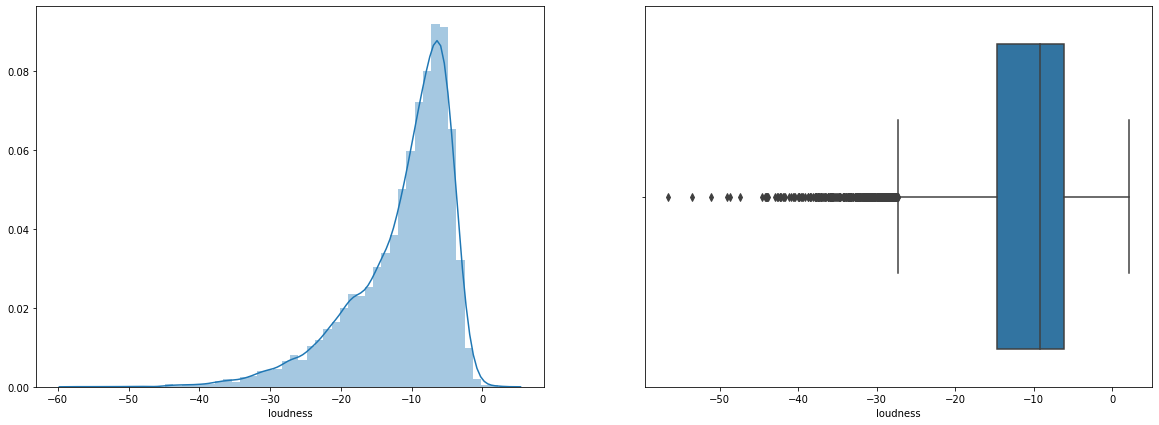

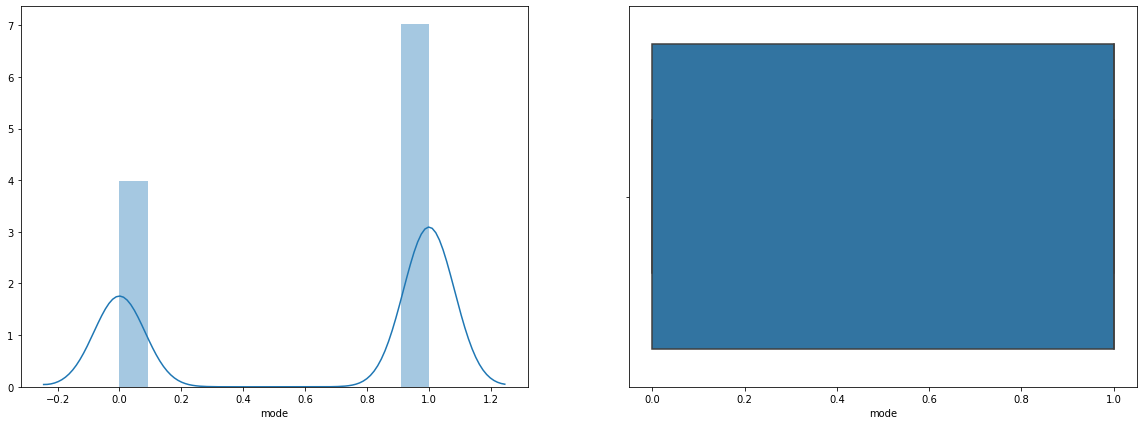

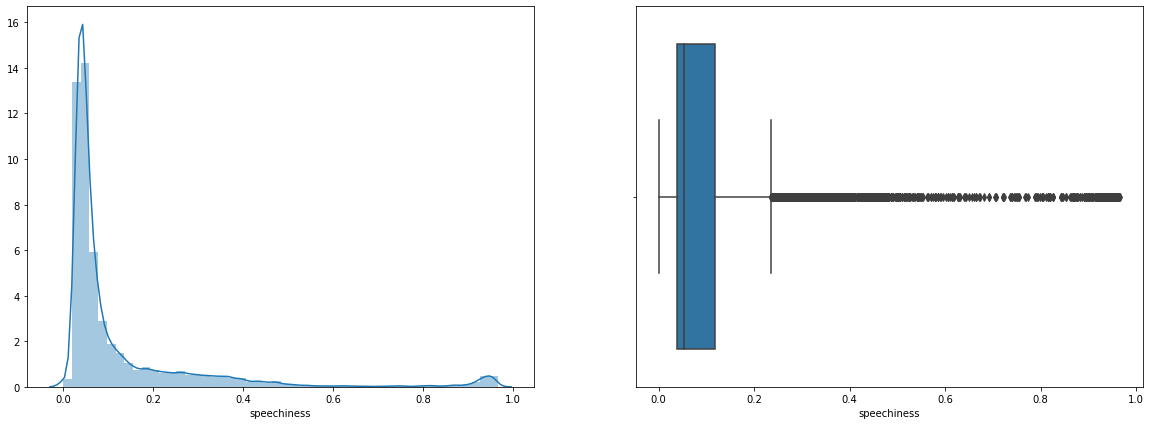

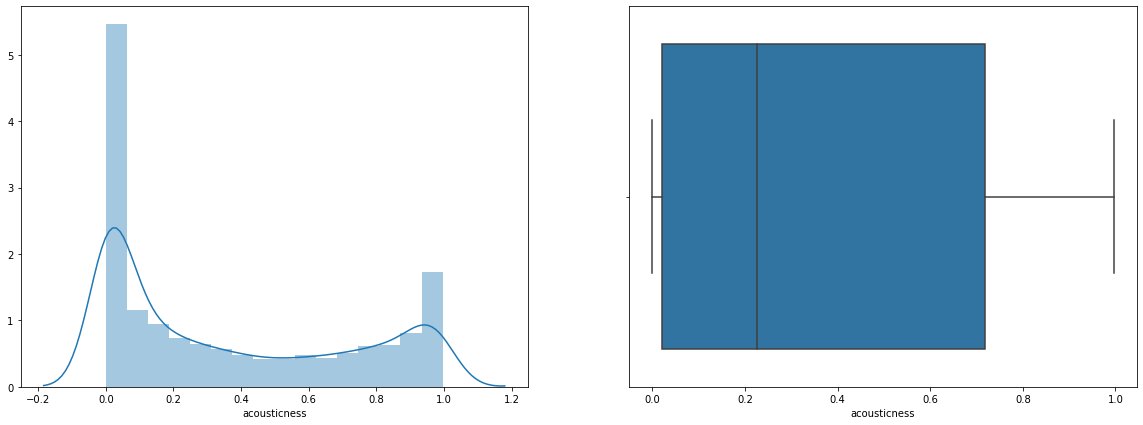

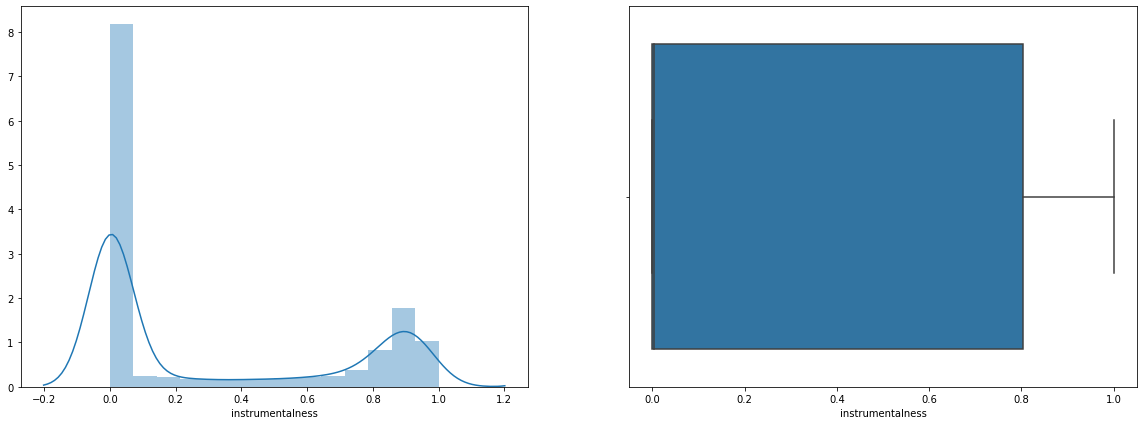

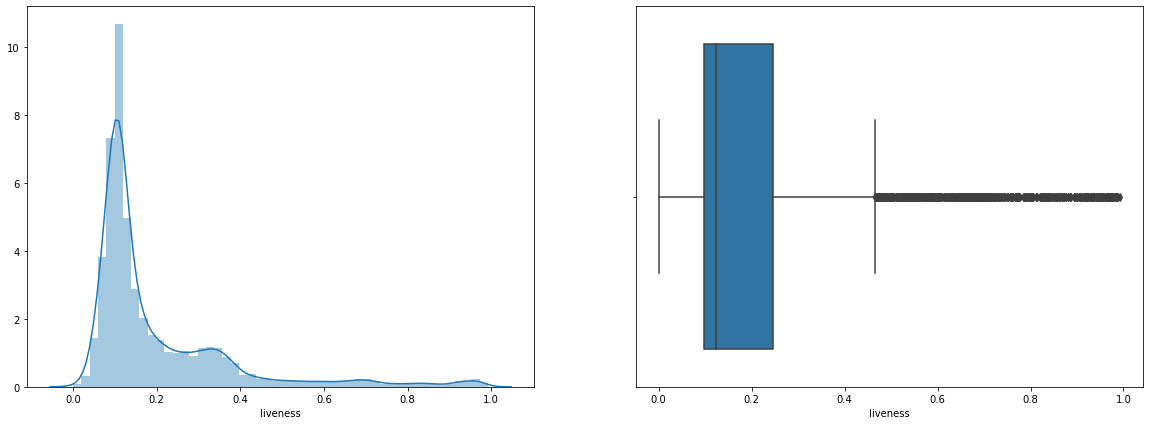

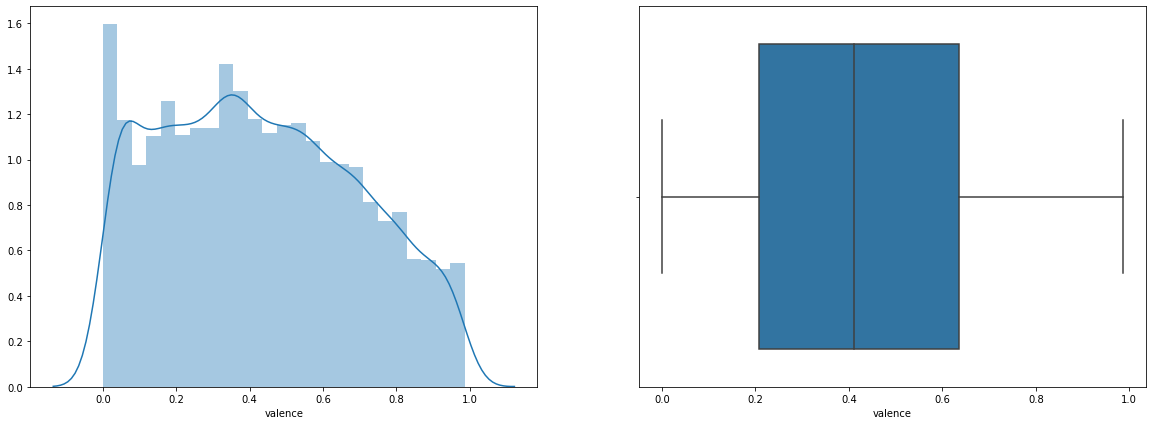

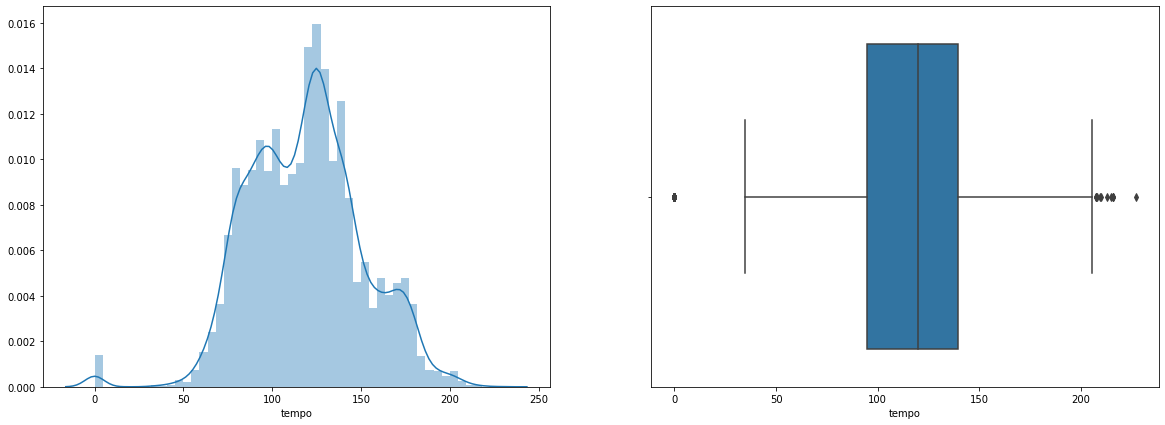

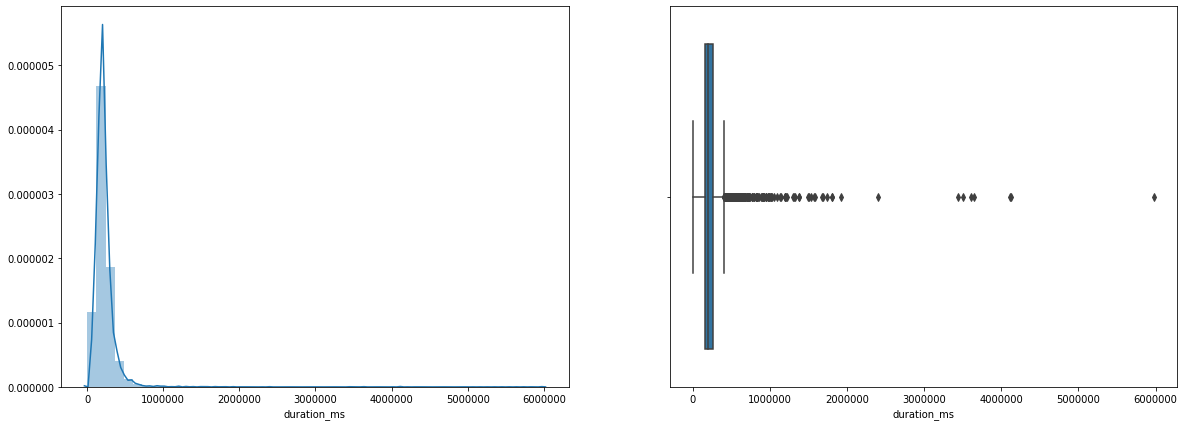

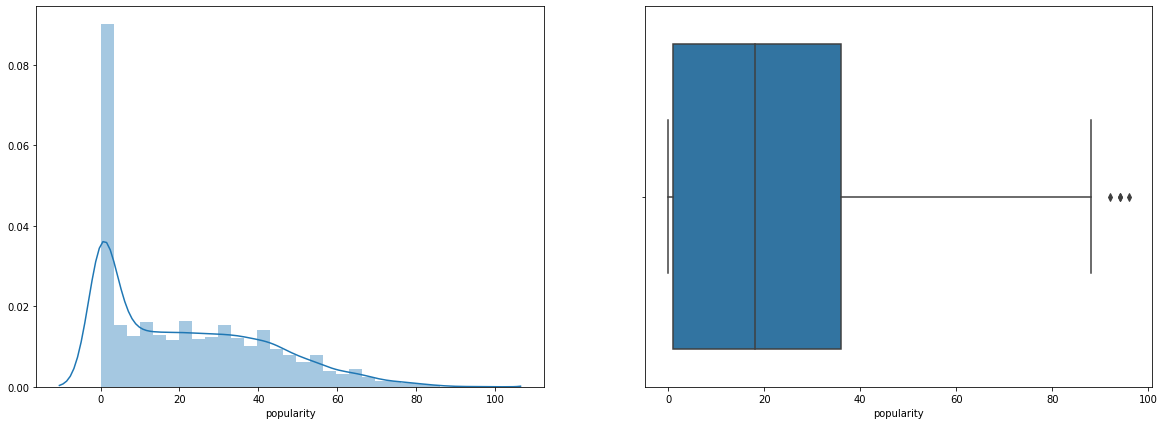

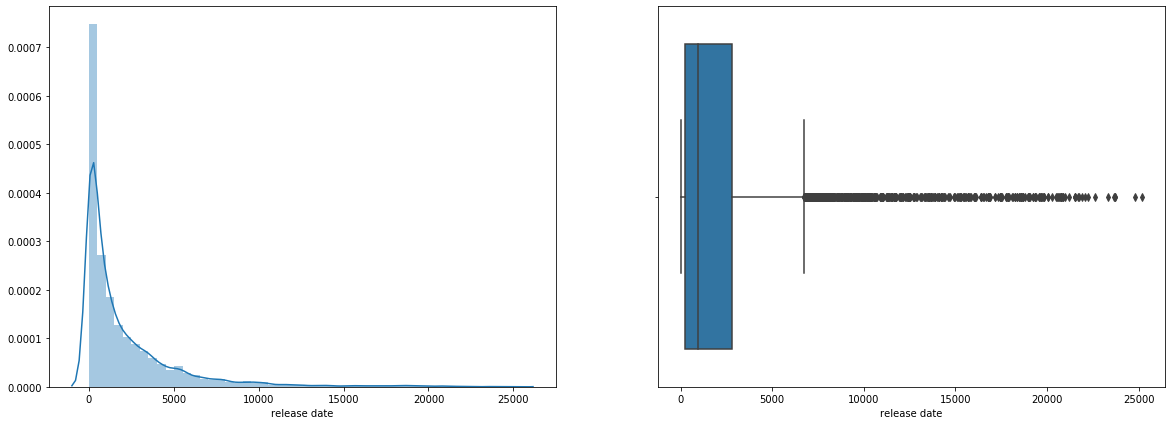

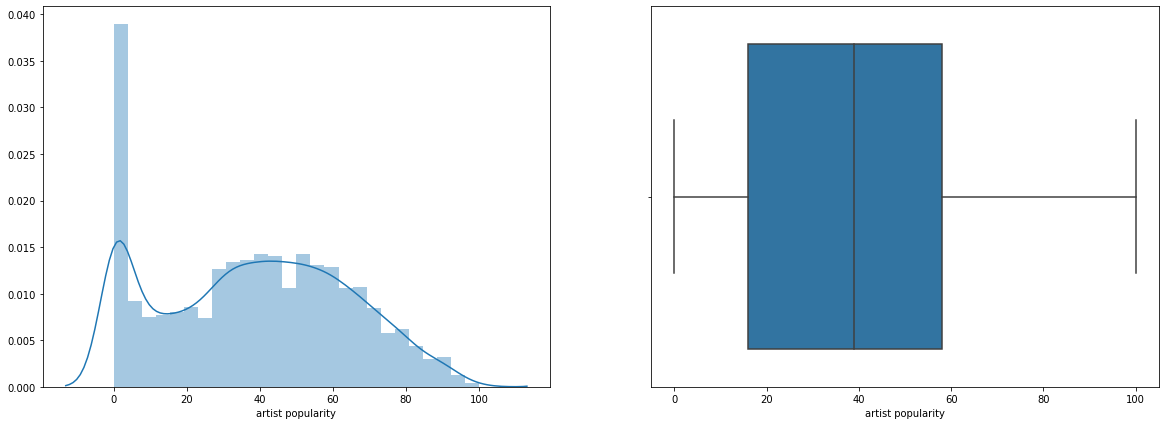

In [13]:
import matplotlib.pyplot as plt

df_drop = df.dropna()
cols = df_drop.columns[6:]

for col in cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

    sns.distplot(df_drop[col], ax=ax1)
    sns.boxplot(df_drop[col], ax=ax2)


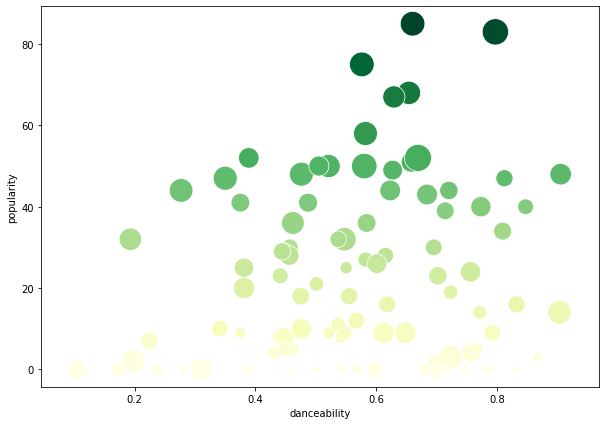

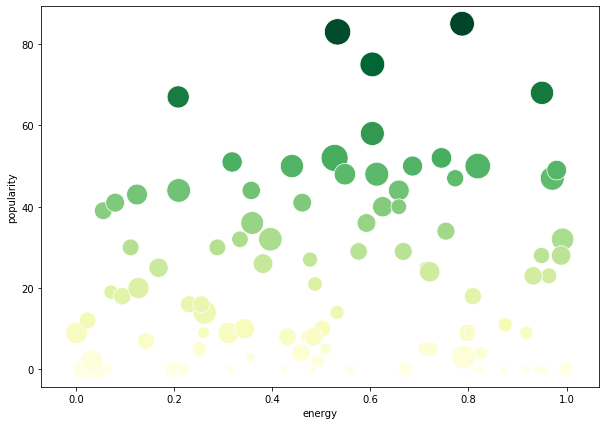

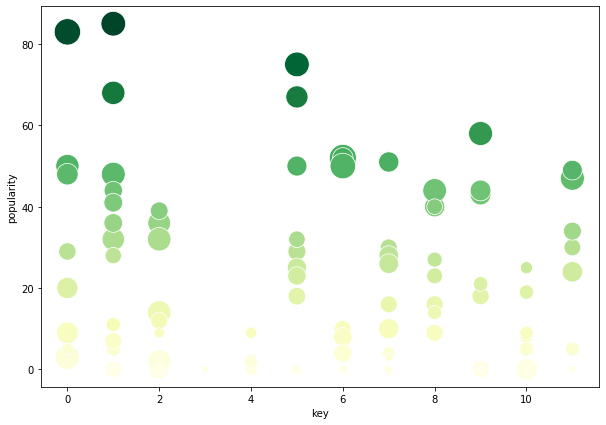

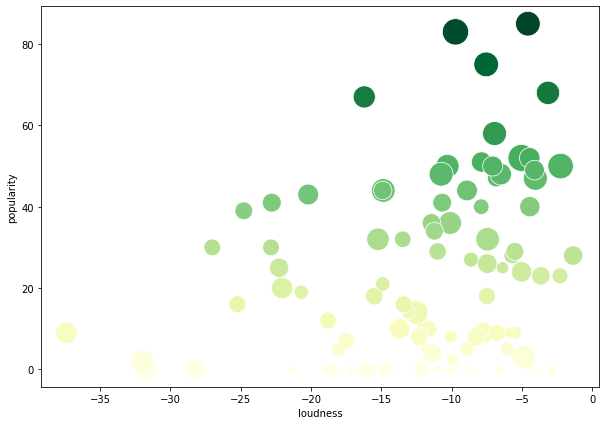

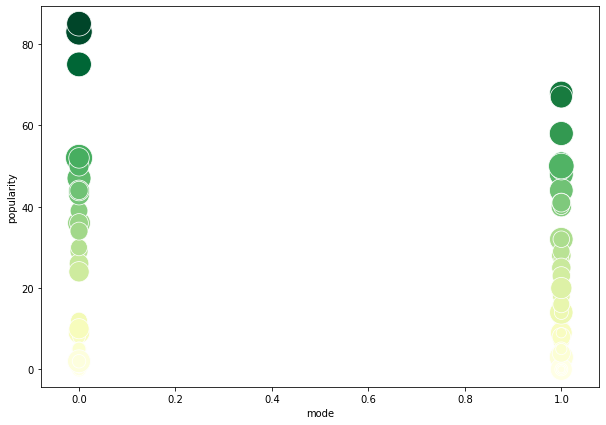

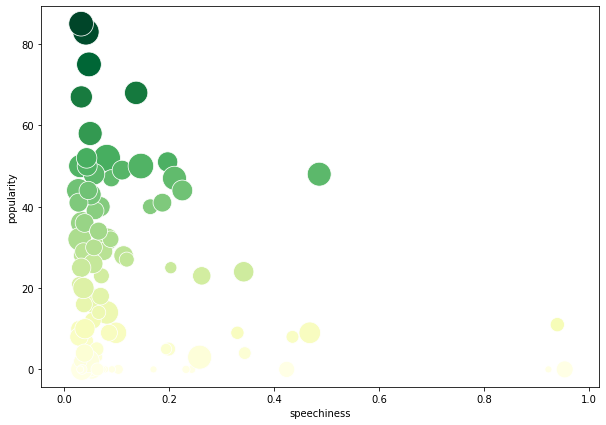

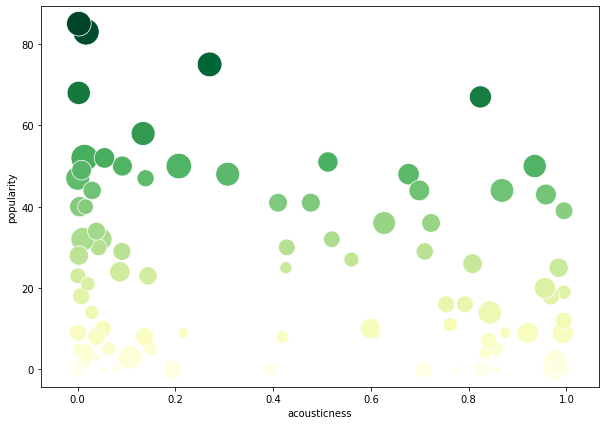

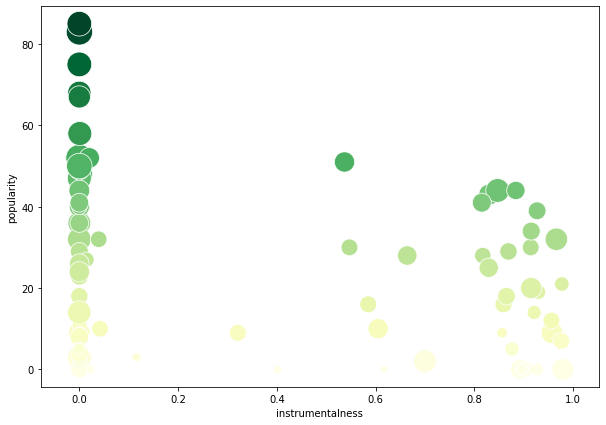

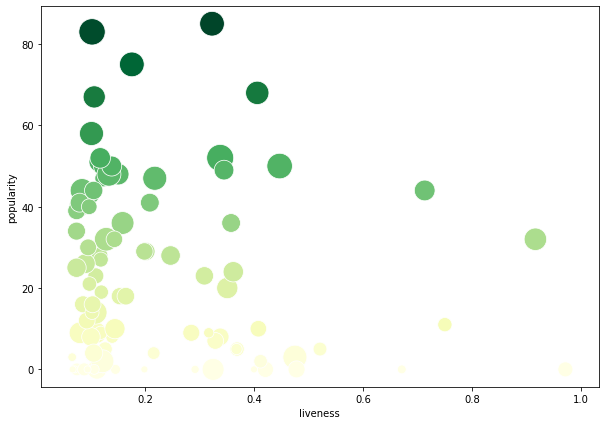

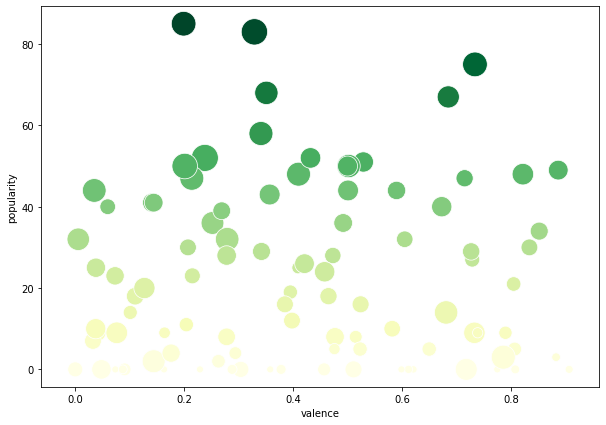

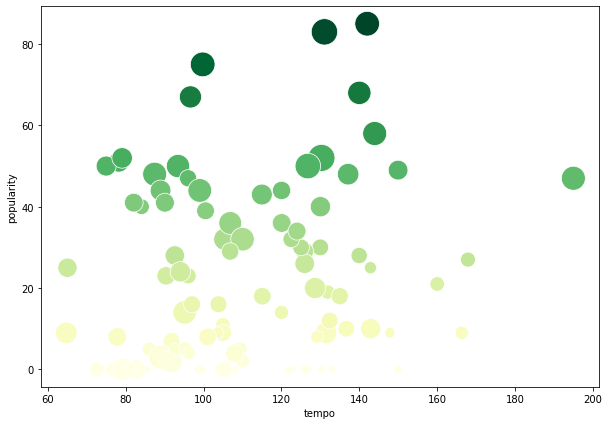

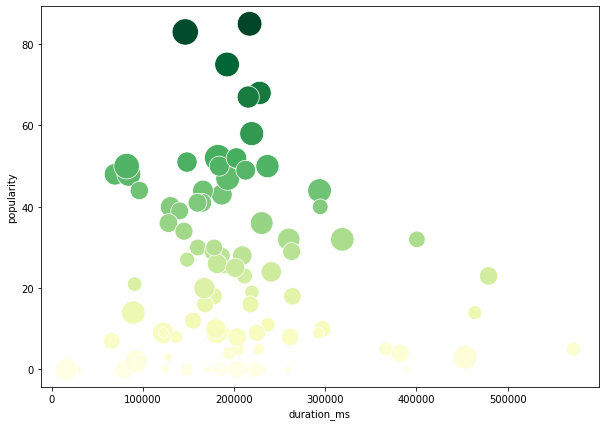

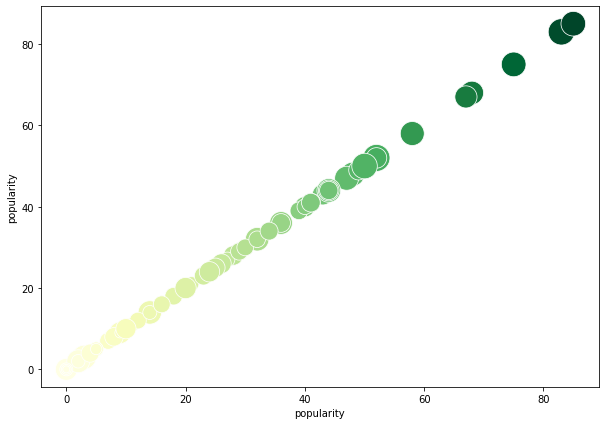

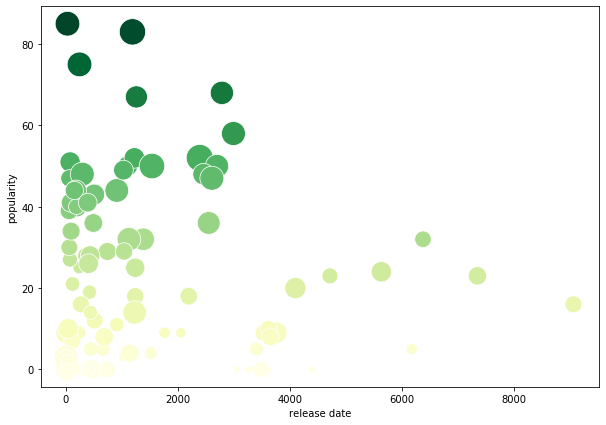

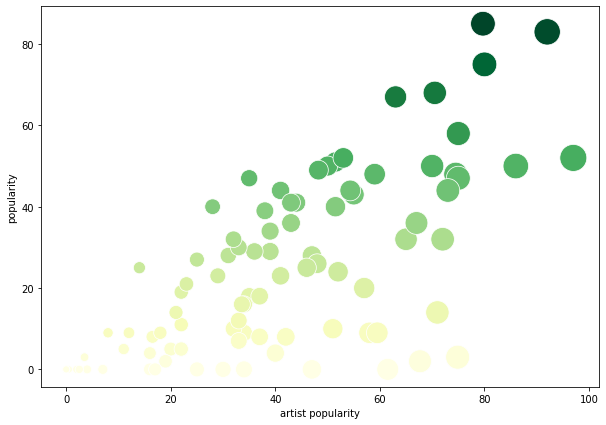

In [40]:
df_samp = df_drop.sample(100)
for col in cols:
    fig, ax = plt.subplots( figsize=(10,7))
    sns.scatterplot(df_samp[col], df_samp["popularity"], 
                    hue = df_samp["popularity"], size = df["artist popularity"], 
                    sizes=(50,750), legend=False, palette="YlGn")

In [ ]:
df_samp = df_drop.sample(100)
fig, axs = plt.subplots(5, 3, figsize=(50, 25))


for i in range(len(cols)):
    sns.scatterplot(df_samp[cols[i]], df_samp["popularity"], 
                    hue = df_samp["popularity"], size = df["artist popularity"], 
#                     sizes=(50,750), 
                    legend=False, palette="Wistia", ax=axs.flat[i])